In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import keras

from keras.layers import Dense, Activation, Input
from keras.models import Model

In [23]:
ds = pd.read_csv('../data/train.csv')
data = ds.values[:5000, 1:]/255.0
print data.shape

(5000, 784)


In [27]:
# Define the layers
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid')
y = Dense(784,)
ya = Activation('sigmoid')

# connect layers for autoencoder
out = ya(y(a1(h1(inp))))

# Create autoencoder model
model = Model(inputs=[inp], outputs=[out])
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Build encoder model
encoder = Model(inputs=[inp], outputs=[a1(h1(inp))])
encoder.summary()

# Build decoder model
dec_inp = Input(shape=(100,))
dec_out = ya(y(dec_inp))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_27 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 784)               79184     
_________________________________________________________________
activation_28 (Activation)   (None, 784)               0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu

In [28]:
hist = model.fit(data[:4500], data[:4500],
                epochs=50,
                shuffle=True,
                batch_size=100,
                validation_data=(data[4500:], data[4500:]))

Train on 4500 samples, validate on 500 samples
Epoch 1/50
4500/4500 [==============================] - 0s - loss: 0.1130 - acc: 0.0064 - val_loss: 0.0690 - val_acc: 0.0140
Epoch 2/50
4500/4500 [==============================] - 0s - loss: 0.0690 - acc: 0.0087 - val_loss: 0.0672 - val_acc: 0.0120
Epoch 3/50
4500/4500 [==============================] - 0s - loss: 0.0676 - acc: 0.0124 - val_loss: 0.0657 - va

In [29]:
ex = encoder.predict(data[:100])
print ex.shape

(100, 100)


In [30]:
dx = decoder.predict(ex)
print dx.shape

(100, 784)


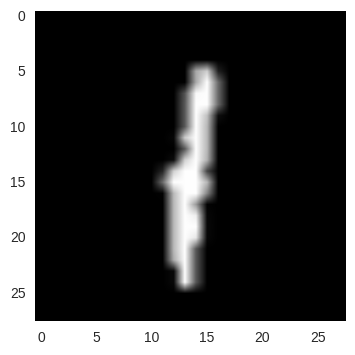

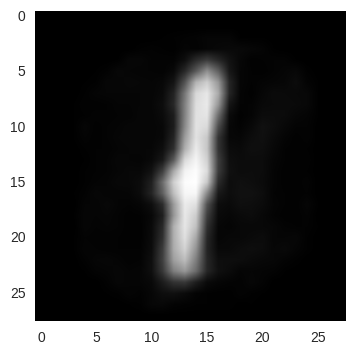

In [38]:
n = np.random.choice(range(100))
plt.figure(0)
plt.grid('off')
plt.imshow(data[n].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid('off')
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')